Introduction to regreassion with neural networks in tensorflow

#ReLU (rectified linear unit) - hidden activation
there are many definition for a regression problem in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter.. predicting a number

In [15]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Creating data to view and fit

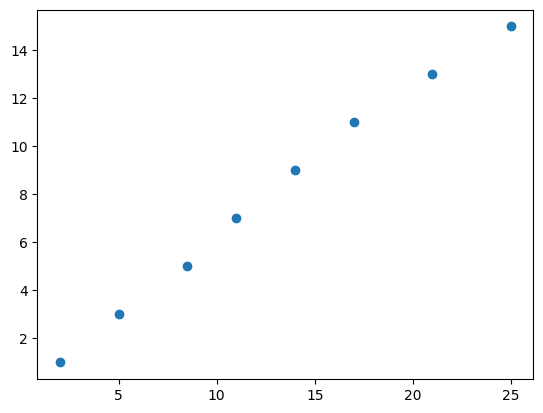

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#create features
x=np.array([2.,5.,8.5,11,14,17,21,25])
y=np.array([1,3,5.,7.,9,11.,13,15])
plt.scatter(x,y);

In [17]:
# house=tf.constant(["bed","bath","garage"])
# house_price=tf.constant([43333])

In [18]:
X=tf.cast(tf.constant(x),dtype=tf.float32)  #turn your numpy array to tensors
y=tf.cast(tf.constant(y),dtype=tf.float32) 
x,y # converting it into tensors

(array([ 2. ,  5. ,  8.5, 11. , 14. , 17. , 21. , 25. ]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15.], dtype=float32)>)

**Steps in modelling with tensorflow**

1. **creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **compiling a model** - define the loss function( in others words, the function which tells our model how wrong it is) and the optimer( tells our model how to imporve the patterns its learning)and evaluation metrices(what we can use to interpret the performance of our model)
3. fitting a model - letting the model try to find patterns between x and y ( features and labels) 

In [5]:
#set random seed
tf.random.set_seed(32)

#1.create a model using the sequential API
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compile the model
model.compile(loss=tf.keras.losses.mae, #mae=mean absoulte error
              optimizer=tf.keras.optimizers.SGD(),  #or optimizer=["sgd"]
              metrics=["mae"])

#3.fit the model
model.fit(tf.expand_dims(X, axis=-1), y , epochs = 5) 
#it has 5 opportunity to figure out the patterns between x and y

Epoch 1/5
1/1 [==============================] - 1s 929ms/step - loss: 14.7900 - mae: 14.7900
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 13.1062 - mae: 13.1062
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 11.4224 - mae: 11.4224
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 9.7387 - mae: 9.7387
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 8.0549 - mae: 8.0549


In [6]:
#check out x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 2. ,  5. ,  8.5, 11. , 14. , 17. , 21. , 25. ], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15.], dtype=float32)>)

In [7]:
#try ans make a prediction using our model
model.predict([2.5])
model.predict([5])

1/1 [==============================] - 0s 98ms/step


array([[0.66021055]], dtype=float32)

improving the model moreover the error is where low as we can see in mae but to we are improving the model
improving the model

**we can imporve our model, by altering the steps we took to create a model**
1. **creating a model** - here we might add more layers, increase the number of hiddden units(all the neurons) within each of the hidden layers,change the acivation function of each layer.
2. **compiling a model** - here we might change the optimization funciton or perhaps the learning rae of the optimization function.
3. **Fitting a model** -  here we might fit a model for more epochs(leave it training for longer) or on more data (give the model more examples to learn from.)


In [ ]:
#let's rebuild the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [9]:
model.predict([29])

1/1 [==============================] - 0s 100ms/step


array([[16.14266]], dtype=float32)

In [10]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 2. ,  5. ,  8.5, 11. , 14. , 17. , 21. , 25. ], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15.], dtype=float32)>)

In [11]:
 #create the model this time with an extra hidden layer with 100 hidderen layers
model2=tf.keras.Sequential([
     tf.keras.layers.Dense(100,activation="relu"), #hidden units
     tf.keras.layers.Dense(1)
 ])

In [12]:
# compile the model
model2.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
#3. fit the model
model2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [14]:
model.predict([29])

1/1 [==============================] - 0s 47ms/step


array([[16.14266]], dtype=float32)

Common ways to imporve a deep model:
1. Adding layers
2. increase the number of hidden units
3. change the activation 
4. change the optimization function
5. change the learning rate eg:in Adam(learning_rate=0.01)
6. fitting in more data
7. fitting for longer

# Evaluation a  model performance
in practice, a typical workflow you will go through when building neural networks is;
build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it- -> ...


when it comes to evaluation ... thera are 3 words you should 
visualize, visualize, visualize

it's a good idea to visualize :
* the data - what data are we working with ? what does it like?
* the model itself - whata does our model look like
* the training of a model - how does a model perform while it  learns?
* the predicions of the model- how do the predicitions of a model line up against the ground truth( the origingal labels)?

In [19]:
#make a bigger dataset:
x=tf.range(-100,100,4)

In [20]:
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
#make labes for the dataset
y=x+10

In [22]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

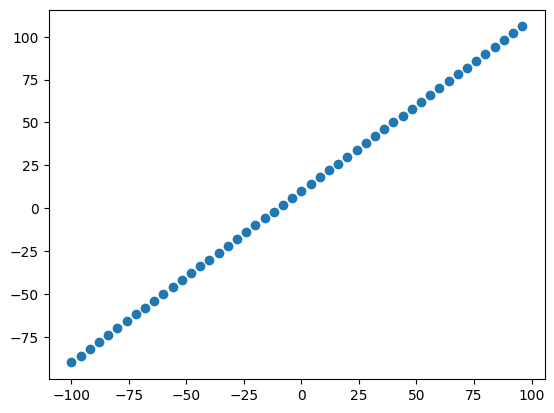

In [23]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(x,y)

#010 the 3 datasets...
* **training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **validation set** -  the model gets tuned on this data(tweak a model),which is typically 10 -15 % of the data
* **test set** - th model gets evaluated on this data to test what is has learned , this set is typically 10-15%of the total dta available.

In [24]:
#check the lenght of how many samples we have
len(x)

50

In [25]:
x_train=x[:40]   # first 40
y_train=y[:40]

x_test=x[40:]    # last 10
y_test=y[40:]

now we have got our data in training and test set, let's visualize it again!

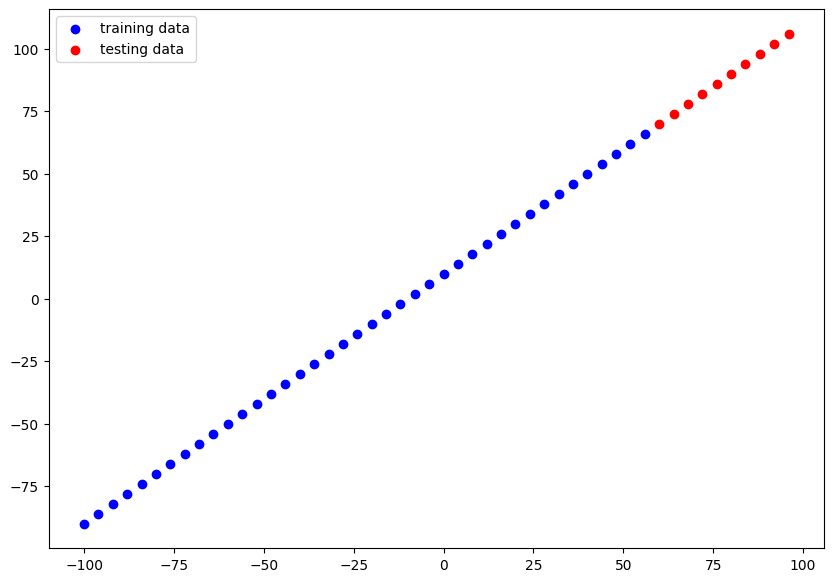

In [26]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train,y_train,c="b",label="training data")
plt.scatter(x_test,y_test,c="red",label="testing data")
plt.legend()

In [27]:
#011 let's hava a look at how to build a neural network for our data

#1.create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3.fit the model
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


ValueError: ignored

In [ ]:
#visualizing the model
model.summary()


In [ ]:
# let's creata a model which builds automatically by defining the input_space arguments 
tf.random.set_seed(22)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],name="inputlayre")  #one input and one output
],name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

* total params=total numbers of parameters in the model
* trainable parameters - these are parameters(patterns) the model can updata as it trains
* non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patters or parmeters from other models during **transfer learning**
* **Resources:** for a more in depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning
* **Exercise:** try playing ground with the number of hidden units in the dense layer, see how that effects the number of parmeters(total and trainable) by callin model.summary()

In [ ]:
# google fundamentals of netural network weights and biases
# let's fit our model
model.fit(x_train,y_train,epochs=100,verbose=1)

In [ ]:
#get the summany of our model
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

#013 Visualising a model's predictions
to visualize predictions, its a good idea to plot them against the ground truth labels.

often you will see this in the form of y_test or y_true, versus y_pred(ground truth versus you model) 

In [ ]:
#make some predicitons
y_pred=model.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
#let's create a plotting function
# Note:if you feek like you are goint to reuse some kind of functionality in the future, it's a good idea to turn it into a function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="traing data")
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  plt.scatter(test_data,predictions,c="r",label="predictions")
  plt.legend();


In [ ]:
plot_predictions()   # in this plot i got wrong values because while training i have done some mistakes

#014 Evaluating our model's predictions with regression evaluation metrics

depending on the problem you're working on there will be differenet evalution metrics to evaluate your models prefomance.

since we are working on a regression,two of the main metrics
* MAE - on average how wrong is each of my model's predictions
* MSE - mead square error,"square the average errors"

In [ ]:
#evaluate the model on the test
model.evaluate(x_test,y_test)

In [ ]:
y_pred.shape,y_test

In [ ]:
tf.squeeze(y_pred)  #get rid of one dimension

In [ ]:
#calculate the mean square error 
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

 # take care of the shape of both y_true and y_pred must be same

In [ ]:
tf.keras.losses.MAE(y_test,tf.squeeze(y_pred))

In [ ]:
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

#017 running experiments to improve our model
build a model->fit a model->evaluate it -> tweak a model-> fit it -> evaluate it ->tweak it ...

1. Get more data-get more examples for your model to train on.
2. make you model larger(using a more complex model) - this might ocm in the form of more layers or more hidden units in each layers.
3. train for longer - give you model more of a change of find patters in the data;


#let's do 3 modelling experiments
1. model_1 - same as the original model 1 layer, trained for 100 epochs
2. model_2 - 2 layers,100 epochs
3. model_3 - 2 layers,500 epochs

In [ ]:
#build model_1
tf.random.set_seed(24)

#1.create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.complie a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3.fit the model
model_1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)
#tf.expand_dims(x_train, axis=-1) is a TensorFlow function that adds a new dimension to a tensor (an n-dimensional array) at a specific position in the shape. The x_train is the input tensor and axis=-1 means the new dimension will be added as the last axis of the tensor. This can be useful when a model requires a specific shape and the input data needs to be reshaped to match the desired shape.

In [ ]:
y_pred_1=model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=y_pred)

In [ ]:
mae_1=mae(y_test,tf.squeeze(y_pred_1))
mse_1=mse(y_test,tf.squeeze(y_pred_1))
mse_1,mae_1

#Build model_2
2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(24)
#1.creata a model    
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]) 
#in the above we have taken two hidden layers in place of dense(10) we can
# have any arbitary number like 2,3,4,10

#2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3. fit the model
model_2.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

In [ ]:
y_pred_2=model_2.predict(x_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2=mae(y_test,tf.squeeze(y_pred_2))
mse_2=mse(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

#build model_3
2 layers, epochs 500

In [ ]:
tf.random.set_seed(24)
#1.creata a model    
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]) 
#in the above we have taken two hidden layers in place of dense(10) we can
# have any arbitary number like 2,3,4,10

#2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3. fit the model
model_3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=500)

In [ ]:
y_pred_3=model_3.predict(x_test)
y_pred_3
# plot_predictions(predictions=y_pred_3)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3,show_shapes=True)

In [ ]:
plot_predictions(predictions=y_pred_3)
mae_3=mae(y_test,tf.squeeze(y_pred_3))
mse_3=mse(y_test,tf.squeeze(y_pred_3))

#019 comparing the results of our experiments
we've run few experiments let compare the results 

***Note : you want ot start with small experimetns (small models) and make sure they work and then increase their scale when necessary.***

In [ ]:
# let's compare our model result using a pandas dataframe
import pandas as pd
model_resluts=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(model_resluts,columns=["model","mae","mse"])

In [ ]:
all_results

In [ ]:
model_2.summary()

**NOTE:**one of your main goals should be to minimize the time between your experiments. the more experiments you do , the more things you'll figure out which don't work and in turn, get closed to figuring our what does work.Remember the machine learning practioner's motto:"experiment experiment experiment" 

# tracking your experiments 
one really good habit in machine learning modelling is to trach the results of you experiments. 
And when doing so, it can be tedious if you're  running lots of experiments.
there are tools to help us!

* **resource:** as you build more models, you'll want to look into using:
1. tensorBoard
2. weights and biases

#Saving the models
 saving our model allows us to use them outside of google colob such as in a web app or mobile app

 there are two main formats we can save our models too:
 1. the SavedModels format
 2. the HDFS format

In [ ]:
model_2.save("best_model_SavedModel_format")

In [ ]:
model_2.save('firstmode.h5')

#loading in a saved model



In [ ]:
#load in the saved model format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

In [ ]:
model_2.summary() #both are same

In [ ]:
#compare model_2 predictions with saved model format model predictions
model_2_preds=model_2.predict(x_test)
loaded_preds=loaded_SavedModel_format.predict(x_test)
model_2_preds==loaded_preds

In [ ]:
#load in model using the .h5 format
load_h5=tf.keras.models.load_model("/content/firstmode.h5")
load_h5.summary()

#download a model (or any other file)from google colab
1. you can go to the "files" tab and right click on the file you're after and click "download"
2. use code
3. save it to google drive by connecting google drive and copying it there;


In [ ]:
#from google.colob import files
#files.download("write the path of file to download")

In [ ]:
#save a file from google colob to google drive
# !cp /content/best_model_SavedModel_format /content/drive/...

#023 Putting together what we learned


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

In [ ]:
df.info

In [ ]:
df["smoker"]
#they are all of different datatype
#lets try one - hot encoding our dataframe so its all numbers
df_one_hot=pd.get_dummies(df)

In [ ]:
#create x and y values (features and labels)
x=df_one_hot.drop("charges",axis=1)
y=df_one_hot["charges"]
y.head()

In [ ]:
#create training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_te

In [ ]:
#build a neural network